In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

In [3]:
# Set stock and crypto amounts

btc_amt = 1.2
eth_amt = 5.3
SPY_shares = 50
AGG_shares = 200

In [4]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD" 
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

### Collect Crypto Prices Using the requests library

In [5]:
# Fetch current prices

btc = requests.get(btc_url)
eth = requests.get(eth_url)

btc_json = btc.json()
eth_json = eth.json()

btc_prices = btc_json['data']['1']['quotes']['USD']['price']
eth_prices = eth_json['data']['1027']['quotes']['USD']['price']

# Find current crypto value

btc_value = btc_prices*btc_amt
eth_value = eth_prices*eth_amt

# Print current crypto wallet balance
print(f"The current value of your {btc_amt} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_amt} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $22622.04
The current value of your 5.3 ETH is $2725.47


### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [6]:
alpaca_API_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(alpaca_API_key, alpaca_secret_key, api_version="v2")

In [7]:
# Format current date as ISO format
today = pd.Timestamp("2020-11-16", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
2020-11-16 00:00:00-05:00  117.61  117.67  117.58  117.64  5501903  360.98   

                                                             
                             high     low   close    volume  
2020-11-16 00:00:00-05:00  362.49  359.59  362.43  55926517

In [8]:
# Pick AGG and SPY close prices
AGG_close = df_portfolio['AGG']['close'].values[0]
SPY_close = df_portfolio['SPY']['close'].values[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_close:0.2f}")
print(f"Current SPY closing price: ${SPY_close:0.2f}")

Current AGG closing price: $117.64
Current SPY closing price: $362.43


In [9]:
# Compute the current value of shares

spy_value = SPY_shares*SPY_close
agg_value = AGG_shares*AGG_close

# Print current value of share
print(f"The current value of your {SPY_shares} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {AGG_shares} AGG shares is ${agg_value:0.2f}")

The current value of your 50 SPY shares is $18121.50
The current value of your 200 AGG shares is $23528.00


## Savings Health Analysis

In [10]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = (['Crypto', (btc_value+eth_value)],['Shares', (spy_value+agg_value)])
savingsdf = pd.DataFrame(savings,columns=['Type','Amount'])
savingsdf.set_index('Type', inplace=True)

# Display savings DataFrame
savingsdf

,Amount
Type,
Crypto,25347.512
Shares,41649.500


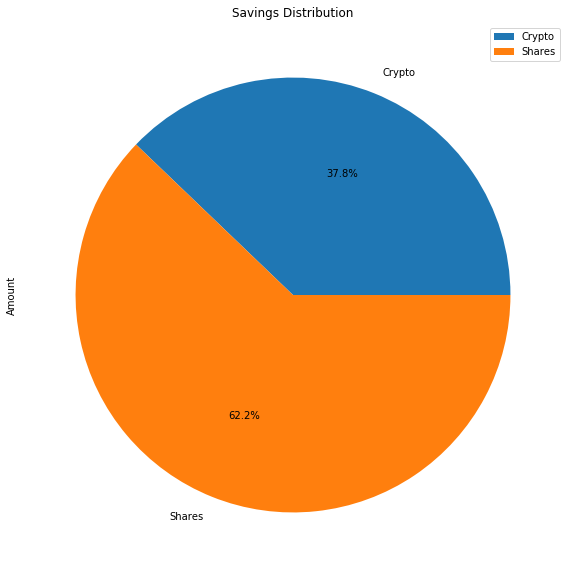

In [11]:
# Plot savings pie chart
# Sources: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html 
# and https://pythonspot.com/matplotlib-pie-chart/

savingsdf.plot.pie(figsize=(15,10), y='Amount', autopct='%1.1f%%',title='Savings Distribution');

In [12]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings[0][1] + savings[1][1]
difference = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations!  You have enough money in your emergency fund!")
elif total_savings == emergency_fund:
    print("Congratulations!  You have met the minimum requirement for your emegency fund!")
elif total_savings < emergency_fund:
    print(f"You are ${difference:0.2f} away from reaching your emergency fund goals.")

Congratulations!  You have enough money in your emergency fund!


# Part 2 - Retirement Planning

In [13]:
# Set the tickers
ticker = ["SPY","AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes 5 years apart.
start_date = pd.Timestamp("2015-11-16", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-11-16", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for SPY and Coca-Cola
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-11-16 00:00:00-05:00  108.63  108.70  108.56  108.63  3037233.0  202.32   
2015-11-17 00:00:00-05:00  108.49  108.78  108.36  108.71  2111084.0  205.99   
2015-11-18 00:00:00-05:00  108.65  108.71  108.54  108.62  1824597.0  206.04   
2015-11-19 00:00:00-05:00  108.76  108.90  108.68  108.68  2655263.0  208.59   
2015-11-20 00:00:00-05:00  108.77  108.82  108.60  108.62  1893587.0  209.45   

                                                              
                             high     low   close     volume  
2015-11-16 00:00:00-05:00  205.64  202.18  205.60   90591238  
2015-11-17 00:00:00-05:00  207.04  204.88  205.38  100515112  
2015-11-18 00:00:00-05:00  208.90  205.99  208.71   94448031  
2015-11-19 00:00:00-05:00  209.05  208.20  208.53   61897641  
2015-11-20 00:00:00-05:00  210.12  208.86  209.35   67021762

In [14]:
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [15]:
# Run the thirty year simulation

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998091,1.000077,1.009220,0.995901,0.998206,0.993268,1.004227,1.001188,0.999115,0.995543,...,1.010328,1.008535,0.999880,1.008628,1.004217,1.005745,1.000554,0.990633,1.002180,0.998439
2,1.002738,1.002272,1.012466,0.990849,0.999065,0.998136,1.002844,1.007111,1.001742,0.994793,...,1.009344,1.010621,1.009707,1.003838,1.004642,1.011154,1.004773,1.000323,0.994950,0.998075
3,1.001539,1.001367,1.011031,0.989392,0.991668,0.990806,0.999007,1.015536,0.997207,0.986399,...,1.013005,0.999572,1.007946,1.003994,1.010565,1.020429,1.001048,0.998121,0.984450,0.996701
4,1.014096,1.004042,1.014302,0.991682,0.986794,0.990050,1.006351,1.014674,1.001276,0.982078,...,1.011290,1.004239,1.002158,1.003260,1.022116,1.016209,1.001914,1.010534,0.990476,0.992918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.559635,7.663521,7.484585,7.615142,3.018829,4.161223,7.268691,9.552046,4.525654,9.106955,...,6.817078,3.942721,8.647560,6.017312,2.171042,13.805964,15.308492,5.787502,6.079838,7.492326
7557,10.555527,7.684374,7.540964,7.611451,3.013766,4.172110,7.287734,9.637599,4.523243,9.120535,...,6.794020,3.964669,8.650361,5.976109,2.173730,13.732181,15.237260,5.771283,6.020089,7.471109
7558,10.638880,7.712288,7.552238,7.541593,3.017441,4.166003,7.309946,9.546986,4.528275,9.135630,...,6.853130,3.957286,8.636140,5.977105,2.188737,13.738393,15.230872,5.811331,6.027140,7.507650
7559,10.637716,7.720241,7.539265,7.479410,3.005827,4.200688,7.325844,9.656307,4.540861,9.148037,...,6.883773,3.961626,8.624764,5.973876,2.202529,13.774039,15.355448,5.820466,6.060404,7.559641


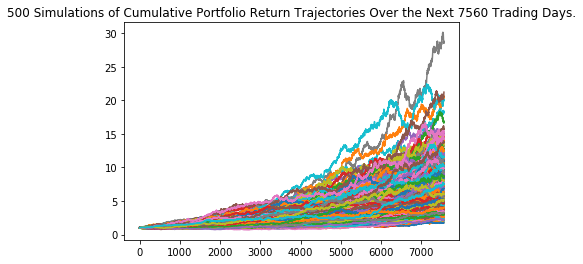

In [16]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

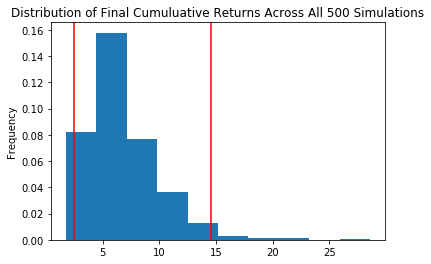

In [17]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

## Retirement Analysis

In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [17]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $46295.41 and $290871.52


## Optional Challenge - Early Retirement

In [35]:
MC_tenyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl10 = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl10)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [37]:
# Set initial investment
initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl10[8]*initial_investment,2)
ci_upper = round(tbl10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $104818.46 and $295864.85


To retire in 10 years, an inital investment of $100,000 will provide a similar upper limit (with a significantly more advantageous lower limit).

In [47]:
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [0.6, 0.4],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl5 = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl5)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

In [53]:
# Set initial investment
initial_investment = 150000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl5[8]*initial_investment,2)
ci_upper = round(tbl5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $150000 in the portfolio over the next 5 years will end within in the range of $144736.93 and $288092.42


To retire in 5 years, an inital investment of $150,000 will provide a similar upper limit (with a significantly more advantageous lower limit).